## Q. 3) Taking any two classes from the above data, add labels to them (0 or 1) and create a new csv file. Split the data into Train / Test set as 70/30. (a) Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs. (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library.  (10 marks)


In [47]:
import pandas as pd
df = pd.read_csv('random_points.csv')

In [48]:
import numpy as np

# Add labels to the classes
df['label'] = np.where(df.index < 15, 0, 1)

# Split data into train and test sets
train_df = df.sample(frac=0.7, random_state=42)
test_df = df.drop(train_df.index)

# Save train and test sets to new CSV files
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
# Load train data
X_train = train_df[['x', 'y']].values
y_train = train_df['label'].values

# Load test data
X_test = test_df[['x', 'y']].values
y_test = test_df['label'].values

# print(X_train)
# print(y_train)


In [49]:
# Logistic Regression 

# It shifts the decision boundary away from the origin, enabling the model to better fit the data
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def logistic_regression(X, y, lr=0.01, num_iter=100000):
    X = add_intercept(X)
    W = np.zeros(X.shape[1])
    cost = []

    for i in range(num_iter):
        z = np.dot(X, W)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        W -= lr * gradient
        cost.append(loss(h, y))

    return W, cost

In [50]:
# find weights
W_best, cost = logistic_regression(X_train, y_train)
print(W_best)

[-7.21788641  0.45437188  0.5638989 ]


In [51]:

def predict_prob(X, W_best):
    X = add_intercept(X)
    return sigmoid(np.dot(X, W_best))

def predict(X, W_best, threshold=0.6):
    return predict_prob(X, W_best) >= threshold

In [52]:
# Predict labels for test data
y_pred = predict(X_test, W_best)
print(y_pred)

[False False  True False  True False  True  True  True]


In [53]:
# Predict using the trained model
y_pred = predict(X_test, W_best)

# Evaluation metrics
tp = np.sum((y_test == 1) & (y_pred == 1))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
accuracy = np.sum(y_test == y_pred) / len(y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Accuracy:", accuracy)

Precision: 0.8
Recall: 0.8
F1-Score: 0.8000000000000002
Accuracy: 0.7777777777777778


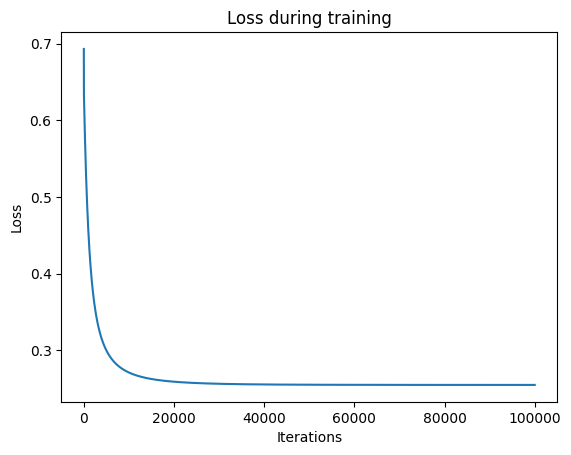

In [14]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(cost)
plt.title('Loss during training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


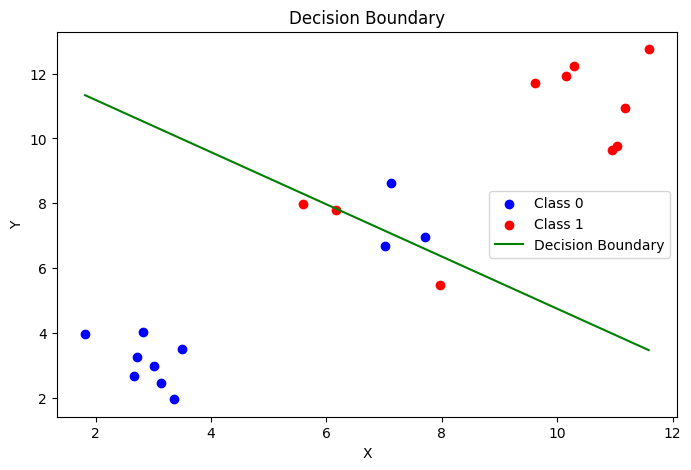

In [54]:
import matplotlib.pyplot as plt

# Plot decision boundary
plt.figure(figsize=(8, 5))

# Plot points from class 0
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')

# Plot points from class 1
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')

# Plot decision boundary
x_values = [np.min(X_train[:, 0]), np.max(X_train[:, 0])]
y_values = - (W_best[0] + np.dot(W_best[1], x_values)) / W_best[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary')
plt.legend()
plt.show()


In [55]:
def loss_with_regularization(h, y, W, lambda_value):
    reg_term = (lambda_value / 2) * np.sum(W[1:]**2)  # Exclude bias term for regularization
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term

def logistic_regression_with_regularization(X, y, lr=0.01, num_iter=100000, lambda_value=0.1):
    X = add_intercept(X)
    W = np.zeros(X.shape[1])
    cost = []

    for i in range(num_iter):
        z = np.dot(X, W)
        h = sigmoid(z)
        gradient = (np.dot(X.T, (h - y)) + lambda_value * W) / y.size  # Regularization term added
        W -= lr * gradient
        cost.append(loss_with_regularization(h, y, W, lambda_value))

    return W, cost


In [56]:
# Find weights with regularization
W_best_reg, cost_reg = logistic_regression_regularized(X_train, y_train)
print("Weights with regularization:", W_best_reg)

# Predict using the trained model with regularization
y_pred_reg = predict(X_test, W_best_reg)

# Evaluation metrics with regularization
tp_reg = np.sum((y_test == 1) & (y_pred_reg == 1))
fp_reg = np.sum((y_test == 0) & (y_pred_reg == 1))
fn_reg = np.sum((y_test == 1) & (y_pred_reg == 0))

precision_reg = tp_reg / (tp_reg + fp_reg) if (tp_reg + fp_reg) != 0 else 0
recall_reg = tp_reg / (tp_reg + fn_reg) if (tp_reg + fn_reg) != 0 else 0
f1_score_reg = 2 * (precision_reg * recall_reg) / (precision_reg + recall_reg) if (precision_reg + recall_reg) != 0 else 0
accuracy_reg = np.sum(y_test == y_pred_reg) / len(y_test)

print("\nPrecision (with regularization):", precision_reg)
print("Recall (with regularization):", recall_reg)
print("F1-Score (with regularization):", f1_score_reg)
print("Accuracy (with regularization):", accuracy_reg)

Weights with regularization: [-4.47351534  0.28641081  0.36938957]

Precision (with regularization): 0.8
Recall (with regularization): 0.8
F1-Score (with regularization): 0.8000000000000002
Accuracy (with regularization): 0.7777777777777778
